In [3]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# disconnect from Artemis
ble.disconnect()

In [324]:
# connect to Artemis
    
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-12 16:06:55,413 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-05-12 16:06:57,949 | INFO     |: Connected to C0:83:D5:66:86:3C


In [122]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [ ]:
# STATIC --- read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*8
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            TWODist.append((reading[nextPos+5]))
            leftPWM.append((reading[nextPos+6]))
            rightPWM.append((reading[nextPos+7]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []
leftPWM = []
rightPWM = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_PID_DATA, "")

In [325]:
# ANGSPEED --- PID to given angular velocity and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            target.append((reading[nextPos+1]))
            error.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            rawY.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
target = []
error = []
yaw = []
ONEDist = []
rawY = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.ANGSPEED, "3")

In [227]:
print(rawY)

['-1', '2', '16', '48', '54', '49', '40', '25', '24', '29', '28', '24', '40', '32', '31', '37', '29', '29', '36', '37', '32', '33', '25', '21', '21', '31', '29', '27', '23', '25', '38', '42', '42', '30', '20', '26', '34', '39', '31', '29', '26', '20', '32', '45', '44', '42', '34', '27', '39', '46', '39', '26', '35', '35', '25', '35', '39', '42', '40', '27', '34', '27', '16', '34', '48', '43', '38', '38', '39', '30', '34', '28', '38', '43', '39', '33', '28', '25', '23', '25', '36', '30', '40', '36', '37', '42', '40', '27', '30', '26', '20', '24', '12', '37', '41', '42', '38', '33', '34', '42', '29', '42', '23', '34', '36', '31', '40', '35', '37', '35', '31', '31', '31', '24', '15', '26', '40', '27', '23', '33', '20', '11', '20', '41', '37', '33', '26', '21', '23', '23', '19', '29', '21', '14', '16', '23', '16', '18', '30', '27', '28', '36', '35', '27', '11', '35', '39', '30', '26', '20', '19', '28', '23', '31', '31', '33', '41', '44', '43', '34', '26', '25', '26', '35', '32', '29', '28'

In [326]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

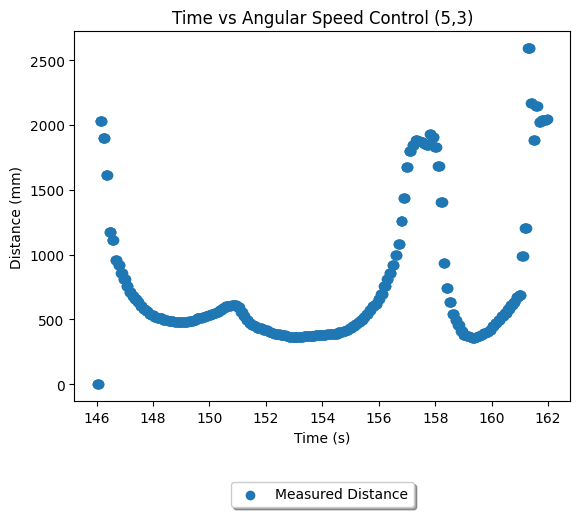

In [327]:
import random

# Collect all data points
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

# Plot all graphs
plt.scatter(intTime, intDist, label = "Measured Distance")
#plt.scatter(intTime, intTarget, label = "Setpoint")
#plt.scatter(intTime, intAng, label = "Angular Speed")
#plt.scatter(intTime, intError, label = "Error")

#plt.scatter(intTime, intSpeed, label = "Speed")

#plt.scatter(intTime, intYaw, label = "Current Yaw")

plt.title("Time vs Angular Speed Control (5,3)")
plt.xlabel("Time (s)")
plt.ylabel("Distance (mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

#plt.xlim((139,142))
#plt.ylim((-500,2000))

#n3n2, p5n3, p0p3, p5p3


In [ ]:
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

In [328]:
p5p3_Target = intTarget
p5p3_Error = intError
p5p3_Speed = intSpeed

p5p3_Time = intTime

p5p3_Ang = intAng
p5p3_Yaw = intYaw

p5p3_Dist = intDist

In [329]:
%store p5p3_Target
%store p5p3_Error
%store p5p3_Speed

%store p5p3_Time

%store p5p3_Ang
%store p5p3_Yaw

%store p5p3_Dist

Stored 'p5p3_Target' (list)
Stored 'p5p3_Error' (list)
Stored 'p5p3_Speed' (list)
Stored 'p5p3_Time' (list)
Stored 'p5p3_Ang' (list)
Stored 'p5p3_Yaw' (list)
Stored 'p5p3_Dist' (list)


In [347]:
print(len(p5p3_Time))

1020


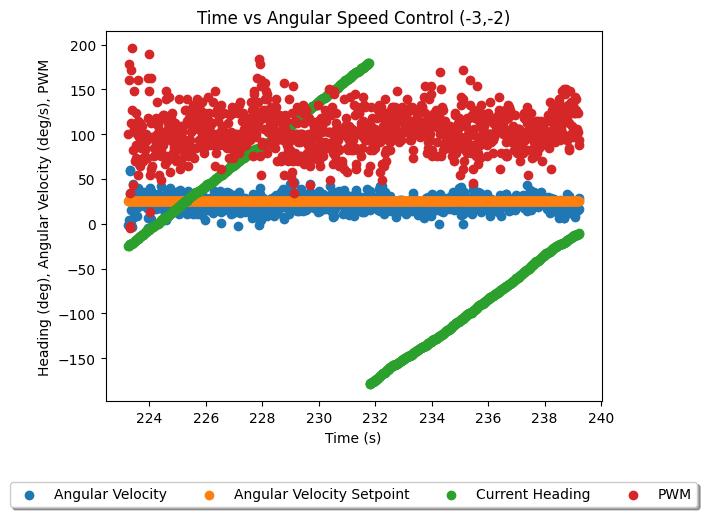

In [413]:
#plt.scatter(offsetY, p5p3_Dist, label = "Measured Distance")
#plt.scatter(intTime, p5p3_Dist, label = "Measured Distance")
plt.scatter(n3n2_Time, n3n2_Ang, label = "Angular Velocity")
plt.scatter(n3n2_Time, n3n2_Target, label = "Angular Velocity Setpoint")
plt.scatter(n3n2_Time, n3n2_Yaw, label = "Current Heading")

#plt.scatter(intTime, intError, label = "Error")

plt.scatter(n3n2_Time, n3n2_Speed, label = "PWM")

#plt.scatter(intTime, intYaw, label = "Current Yaw")

plt.title("Time vs Angular Speed Control (-3,-2)")
plt.xlabel("Time (s)")
plt.ylabel("Heading (deg), Angular Velocity (deg/s), PWM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

#plt.xlim((139,142))
#plt.ylim((-500,2000))

#n3n2, p5n3, p0p3, p5p3


In [364]:
offsetY = [(item+180) for item in p5p3_Yaw]

In [381]:
print(p5p3_Yaw)
print(p5p3_Dist)

[0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 18, 18, 19, 20, 20, 20, 21, 21, 22, 23, 23, 23, 24, 24, 25, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 45, 45, 45, 46, 46, 46, 47, 48, 48, 48, 49, 49, 50, 50, 51, 52, 52, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 56, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 62, 62, 63, 63, 63, 63, 63, 64, 65, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 68, 68, 69, 69, 69, 70, 70, 70, 70, 71, 71, 71, 72, 72, 72, 72, 73, 74, 73, 74, 74, 75, 75, 76, 76, 77, 77, 77, 78, 78, 78, 79, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 83, 84, 85, 85, 86, 86, 87, 88, 88, 88, 88, 89, 89, 90, 90, 90, 91, 91, 92, 93, 93, 93, 92, 92, 93, 94, 94, 95, 95, 95, 96, 97, 97, 97, 98, 98, 98, 99, 99, 99, 100, 100, 100, 101, 101, 101, 102, 102, 102, 102, 103,

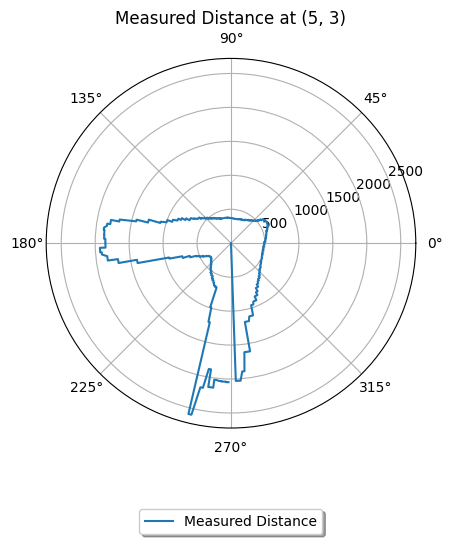

In [523]:
#p5n3_Yaw_f = [ -y+180 for y in p5n3_Yaw ]
plt.polar(np.deg2rad(p5p3_Yaw_f), p5p3_Dist, label = "Measured Distance")

plt.title("Measured Distance at (5, 3)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [369]:
import plotly.express as px
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [524]:
outX_n3n2 = [ d*np.cos((y)*(np.pi/180)) + (-3*304.8) for (d,y) in zip(n3n2_Dist, n3n2_Yaw_f)]
outY_n3n2 = [ d*np.sin((y)*(np.pi/180)) + (-2*304.8) for (d,y) in zip(n3n2_Dist, n3n2_Yaw_f)]

outX_p5p3 = [ d*np.cos((y)*(np.pi/180)) + (5*304.8) for (d,y) in zip(p5p3_Dist, p5p3_Yaw_f)]
outY_p5p3 = [ d*np.sin((y)*(np.pi/180)) + (3*304.8) for (d,y) in zip(p5p3_Dist, p5p3_Yaw_f)]

outX_p0p3 = [ d*np.cos((y)*(np.pi/180)) + (0*304.8) for (d,y) in zip(p0p3_Dist, p0p3_Yaw_f)]
outY_p0p3 = [ d*np.sin((y)*(np.pi/180)) + (3*304.8) for (d,y) in zip(p0p3_Dist, p0p3_Yaw_f)]

outX_p5n3 = [ d*np.cos((y)*(np.pi/180)) + (5*304.8) for (d,y) in zip(p5n3_Dist, p5n3_Yaw_f)]
outY_p5n3 = [ d*np.sin((y)*(np.pi/180)) + (-3*304.8) for (d,y) in zip(p5n3_Dist, p5n3_Yaw_f)]

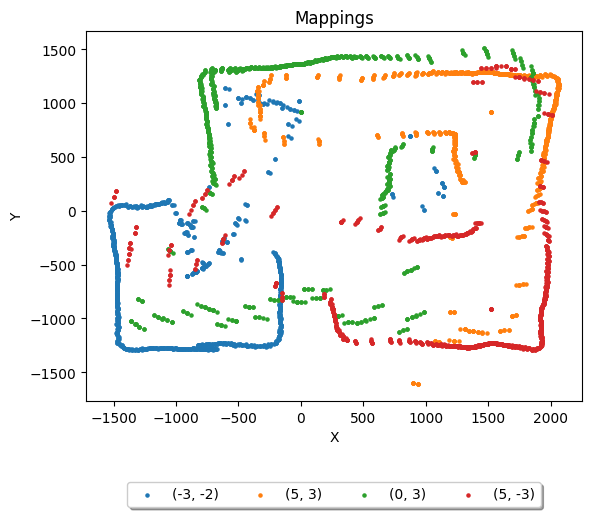

In [566]:
plt.scatter(outX_n3n2, outY_n3n2, label = "(-3, -2)", s= 5)
plt.scatter(outX_p5p3, outY_p5p3, label = "(5, 3)", s= 5)
plt.scatter(outX_p0p3, outY_p0p3, label = "(0, 3)", s= 5)
plt.scatter(outX_p5n3, outY_p5n3, label = "(5, -3)", s= 5)

plt.title("Mappings")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [596]:
walls_start = [(-750, 1300), (1900, 1300), (-1500, -1250), (-1500, -1250), (-1500, 0), (-750, 1300)] 
walls_end = [(1900, 1300), (1900, -1250), (1900, -1250), (-1500, 0), (-750, 0), (-750, 0)]
walls_plot_x = [-750, 1900, 1900, 1900, -1500, 1900, -1500, -1500, -1500, -750, -750, -750]
walls_plot_y = [1300, 1300, 1300, -1250, -1250, -1250, -1250, 0, 0, 0, 1300, 0]

box1_start = [(700, 750), (1250, 750), (1250, -200), (700, -200)]
box1_end = [(1250, 750), (1250, -200), (700, -200), (700, 750)]
box1_plot_x = [700, 1250, 1250, 1250, 1250, 700, 700, 700]
box1_plot_y = [750, 750, 750, -200, -200, -200, -200, 750]

box2_start = [(-200, -700), (300, -700), (300, -1200), (-200, -1200)]
box2_end = [(300, -700), (300, -1200), (-200, -1200), (-200, -700)]
box2_plot_x = [-200, 300, 300, 300, 300, -200, -200, -200]
box2_plot_y = [-700, -700, -700, -1200, -1200, -1200, -1200, -700]

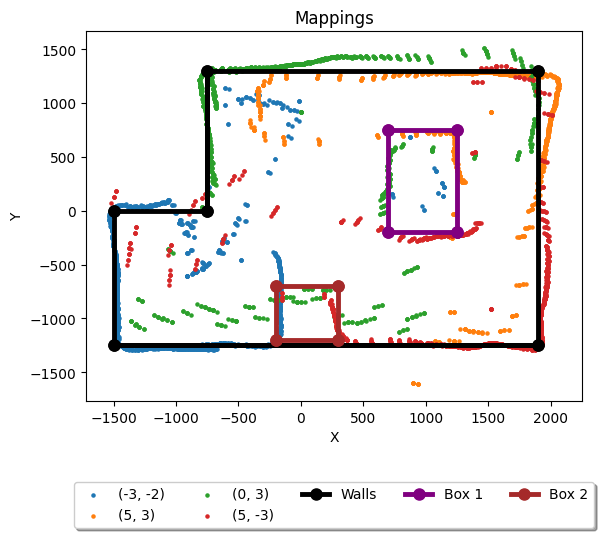

In [601]:
plt.scatter(outX_n3n2, outY_n3n2, label = "(-3, -2)", s= 5)
plt.scatter(outX_p5p3, outY_p5p3, label = "(5, 3)", s= 5)
plt.scatter(outX_p0p3, outY_p0p3, label = "(0, 3)", s= 5)
plt.scatter(outX_p5n3, outY_p5n3, label = "(5, -3)", s= 5)

plt.plot(walls_plot_x, walls_plot_y, color='black', linestyle='solid', marker='o',
     markerfacecolor='black', markersize=8, linewidth=3.5, label = "Walls")

plt.plot(box1_plot_x, box1_plot_y, color='purple', linestyle='solid', marker='o',
     markerfacecolor='purple', markersize=8, linewidth=3.5, label = "Box 1")

plt.plot(box2_plot_x, box2_plot_y, color='brown', linestyle='solid', marker='o',
     markerfacecolor='brown', markersize=8, linewidth=3.5, label = "Box 2")

plt.title("Mappings")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)